In [2]:
### 라이브러리 호출

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import re

In [3]:
### 한글 폰트 설정

import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

<hr>

<h2>2010 ~ 2021 관광목적 외래객 그래프 시각화</h2>

In [7]:
### 외래객 데이터 DataFrame Load

df = pd.read_csv("201001_202112_월별_입국목적별_국적별_외래객입국.csv", encoding="cp949")
df.isnull().sum()

국적별               0
항목                0
단위              136
2010.01 월         0
2010.02 월         0
               ... 
2021.09 월         0
2021.10 월         0
2021.11 월         0
2021.12 월         0
Unnamed: 147    136
Length: 148, dtype: int64

In [8]:
df

,국적별,항목,단위,2010.01 월,2010.02 월,2010.03 월,2010.04 월,2010.05 월,2010.06 월,2010.07 월,...,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,Unnamed: 147
0,총계,계,NaN,569453,638911,769894,730265,729450,718440,754672,...,70112,74463,77029,83005,97087,89800,92416,94358,90150,NaN
1,총계,관광,NaN,400818,446525,545442,543297,525340,520474,541085,...,11492,15381,17847,20297,18452,19611,25698,28734,25630,NaN
2,아시아주,계,NaN,433045,515506,602029,561228,554475,539797,579338,...,43874,42514,43826,44663,52802,49795,46769,49161,53391,NaN
3,아시아주,관광,NaN,329131,383125,448566,441816,423953,414268,439238,...,6514,7376,8355,9714,9965,8303,10367,12968,15790,NaN
4,중국,계,NaN,91252,140571,141457,147680,154066,150119,195188,...,16830,14221,12942,13469,17103,19144,14035,12472,11691,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,구주 기타,관광,NaN,1219,914,1170,1122,1244,1220,1397,...,50,39,66,77,117,137,194,244,115,NaN
132,이란,계,NaN,598,491,818,614,856,744,604,...,15,24,16,22,96,43,31,58,43,NaN
133,이란,관광,NaN,69,44,223,97,186,201,219,...,2,3,1,3,3,6,12,24,4,NaN
134,아시아 기타,계,NaN,1732,1436,1960,2008,2126,3014,2945,...,559,547,812,740,1421,976,1259,1238,1848,NaN


In [13]:
# '항목' column의 '관광'을 그룹으로 분류하여 합계를 구함(국적별 분류를 요하지 않음)
df_groupsum = df.groupby('항목').sum()
df_groupsum

,국적별,단위,2010.01 월,2010.02 월,2010.03 월,2010.04 월,2010.05 월,2010.06 월,2010.07 월,2010.08 월,...,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,Unnamed: 147
항목,,,,,,,,,,,,,,,,,,,,,
계,총계아시아주중국미국러시아오스트레일리아남아프리카공화국국적미상교포일본미주캐나다영국뉴질랜...,0.0,1708359,1916733,2309682,2190795,2188350,2155320,2264016,2501079,...,210336,223389,231087,249015,291261,269400,277248,283074,270450,0.0
관광,총계아시아주중국미국러시아오스트레일리아남아프리카공화국국적미상교포일본미주캐나다영국뉴질랜...,0.0,1202454,1339575,1636326,1629891,1576020,1561422,1623255,1740621,...,34476,46143,53541,60891,55356,58833,77094,86202,76890,0.0


In [46]:
# '계'는 관광목적 이외의 외래객을 합산한 값이므로 제거하고 데이터프레임을 정돈
df_drop1 = df_groupsum.drop('계')
df_trp = df_drop1.T # 행렬반전
df_drop2 = df_trp.drop({'국적별', '단위'})
df_reind1 = df_drop2.reset_index()
df_ren1 = df_reind1.rename(columns={'index' : '기간', '관광' : '관광객'})
df_drop3 = df_ren1.drop(144)
df_drop3

항목,기간,관광객
0,2010.01 월,1202454
1,2010.02 월,1339575
2,2010.03 월,1636326
3,2010.04 월,1629891
4,2010.05 월,1576020
...,...,...
139,2021.08 월,55356
140,2021.09 월,58833
141,2021.10 월,77094
142,2021.11 월,86202


In [48]:
# 관광객 column의 데이터타입을 object에서 int32로 변경
df_astype = df_drop3.astype({'관광객':'int32'})
df_astype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      144 non-null    object
 1   관광객     144 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.8+ KB


<h3> 전력소비량 데이터 </h3>

In [63]:
### 전력소비량 csv파일 로드
df_elec = pd.read_csv('201001_202112_월별_시도별_전력사용량.csv')

In [54]:
### 1번 항목에서 확인했던 전력소비량 데이터 중에서도 평균값만을 위 cpi_total과 같은 형태로 추출
df_drop11 = df_elec.drop({'Unnamed: 0', '시도'}, axis=1)
df_drop11

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2010,1480180,1382020,1308429,1317499,1185530,1114450,1055938,1088438,1058865,1116695,1297575,1442404
1,2010,8725482,8341902,7574084,7727001,7156767,7152029,7589292,7961584,7659696,6868326,7866013,8452695
2,2010,2922775,2719682,2648326,2665253,2453568,2429359,2550149,2600386,2594082,2428098,2623317,2914222
3,2010,3743904,3471888,3484251,3454660,3321968,3301601,3344445,3428974,3394857,3370268,3498295,3773932
4,2010,712924,682498,632293,642843,603935,605548,667137,697066,692544,605233,632721,685316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021,2844658,2738900,2724005,2670493,2722103,2648105,2856350,3073050,2836764,2726495,2679718,2966246
200,2021,1997136,1830234,1771153,1725471,1667691,1697453,1803462,1923328,1791056,1679464,1736069,1864342
201,2021,518258,503324,450805,461823,430958,437447,486838,544310,495549,446949,438179,473291
202,2021,4434196,4039445,4077387,3876573,3877528,3770865,4137216,4257399,3978322,3855222,4108694,4388778


In [55]:
# 연도 column을 기준으로 그룹화, 동시에 평균값을 dataframe에 출력
df_group = df_drop11.groupby('연도').mean()
df_mean = df_group.T # 행렬변환
df_mean

연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1월,2.335103e+06,2.535240e+06,2.498216e+06,2.616024e+06,2.574024e+06,2.671959e+06,2.625319e+06,2.658644e+06,2.844805e+06,2.861434e+06,2.725112e+06,2.867974e+06
2월,2.188708e+06,2.343108e+06,2.465632e+06,2.411552e+06,2.423945e+06,2.459326e+06,2.562954e+06,2.613082e+06,2.749987e+06,2.609034e+06,2.617551e+06,2.658115e+06
3월,2.091419e+06,2.260802e+06,2.371065e+06,2.323784e+06,2.389529e+06,2.403517e+06,2.485011e+06,2.503443e+06,2.525663e+06,2.534628e+06,2.521800e+06,2.533786e+06
4월,2.115786e+06,2.218604e+06,2.263786e+06,2.294385e+06,2.309050e+06,2.356720e+06,2.360203e+06,2.400651e+06,2.472501e+06,2.496506e+06,2.380894e+06,2.464687e+06
5월,1.988779e+06,2.085555e+06,2.139747e+06,2.203519e+06,2.198684e+06,2.227999e+06,2.249152e+06,2.279053e+06,2.384145e+06,2.394589e+06,2.254566e+06,2.402487e+06
6월,1.989683e+06,2.102778e+06,2.152759e+06,2.197991e+06,2.226014e+06,2.254742e+06,2.333418e+06,2.333686e+06,2.414450e+06,2.389401e+06,2.338405e+06,2.472463e+06
7월,2.090517e+06,2.193162e+06,2.243204e+06,2.304199e+06,2.352646e+06,2.316382e+06,2.387664e+06,2.541676e+06,2.589997e+06,2.527423e+06,2.474575e+06,2.704223e+06
8월,2.191269e+06,2.256481e+06,2.346241e+06,2.391003e+06,2.354869e+06,2.466411e+06,2.612461e+06,2.667867e+06,2.913653e+06,2.797555e+06,2.623483e+06,2.878233e+06
9월,2.131955e+06,2.168204e+06,2.227551e+06,2.281235e+06,2.244794e+06,2.335535e+06,2.423760e+06,2.490357e+06,2.572296e+06,2.567605e+06,2.653576e+06,2.636405e+06
10월,1.973165e+06,2.094313e+06,2.052624e+06,2.173317e+06,2.224439e+06,2.203005e+06,2.267599e+06,2.256988e+06,2.351616e+06,2.389578e+06,2.297959e+06,2.461072e+06


In [56]:
df_mean.columns

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='연도')

In [57]:
df_reset = df_mean.reset_index()

In [58]:
# 데이터를 세로로 이어붙이기(melt 사용)
df_melt = pd.melt(df_reset,
                    id_vars=['index'],
                    value_vars=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
df_melt

,index,연도,value
0,1월,2010,2.335103e+06
1,2월,2010,2.188708e+06
2,3월,2010,2.091419e+06
3,4월,2010,2.115786e+06
4,5월,2010,1.988779e+06
...,...,...,...
139,8월,2021,2.878233e+06
140,9월,2021,2.636405e+06
141,10월,2021,2.461072e+06
142,11월,2021,2.519389e+06


In [59]:
# 연도 column 삭제
df_drop22 = df_melt.drop('연도', axis=1)
df_type = df_drop22.astype({'value':'int64'})

In [60]:
df_type = df_type.rename(columns={'index':'기간', 'value':'전력소비량'})
df_type # 전력소비량 변수

,기간,전력소비량
0,1월,2335102
1,2월,2188707
2,3월,2091419
3,4월,2115785
4,5월,1988778
...,...,...
139,8월,2878232
140,9월,2636404
141,10월,2461071
142,11월,2519389


In [61]:
### 두 데이터프레임 합치기

df_con1 = df_type.rename(columns={'index' : '기간', 'value' : '전력소비량'}, inplace=False)
df_con2 = df_con1['전력소비량']
result = pd.concat([df_astype,df_con2],axis=1)
result ### 시각화 대상 변수

,기간,관광객,전력소비량
0,2010.01 월,1202454,2335102
1,2010.02 월,1339575,2188707
2,2010.03 월,1636326,2091419
3,2010.04 월,1629891,2115785
4,2010.05 월,1576020,1988778
...,...,...,...
139,2021.08 월,55356,2878232
140,2021.09 월,58833,2636404
141,2021.10 월,77094,2461071
142,2021.11 월,86202,2519389


<hr>

<h1>평균 전력소비량 추이 VS 입국 관광객 추이 시각화</h1>

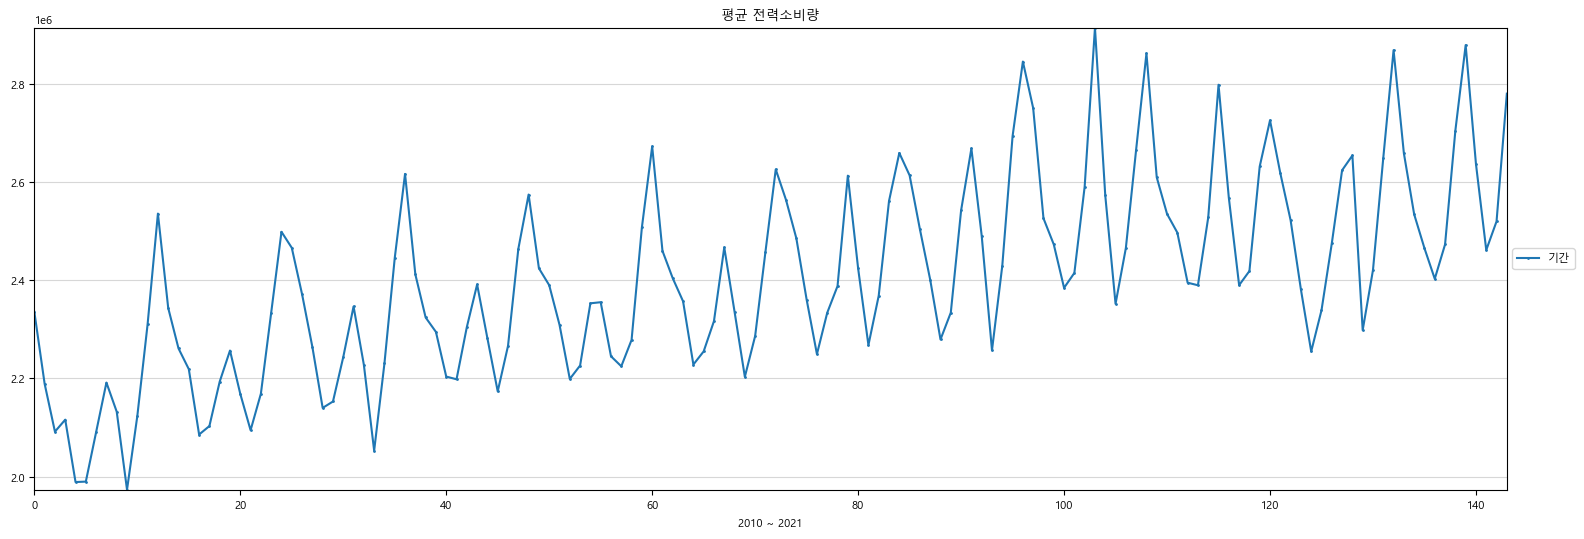

In [62]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df_type["전력소비량"], marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df_type.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('평균 전력소비량')

# x축 레이블 설정
plt.xlabel('2010 ~ 2021')

# y축 레이블 설정
# plt.ylabel('')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()

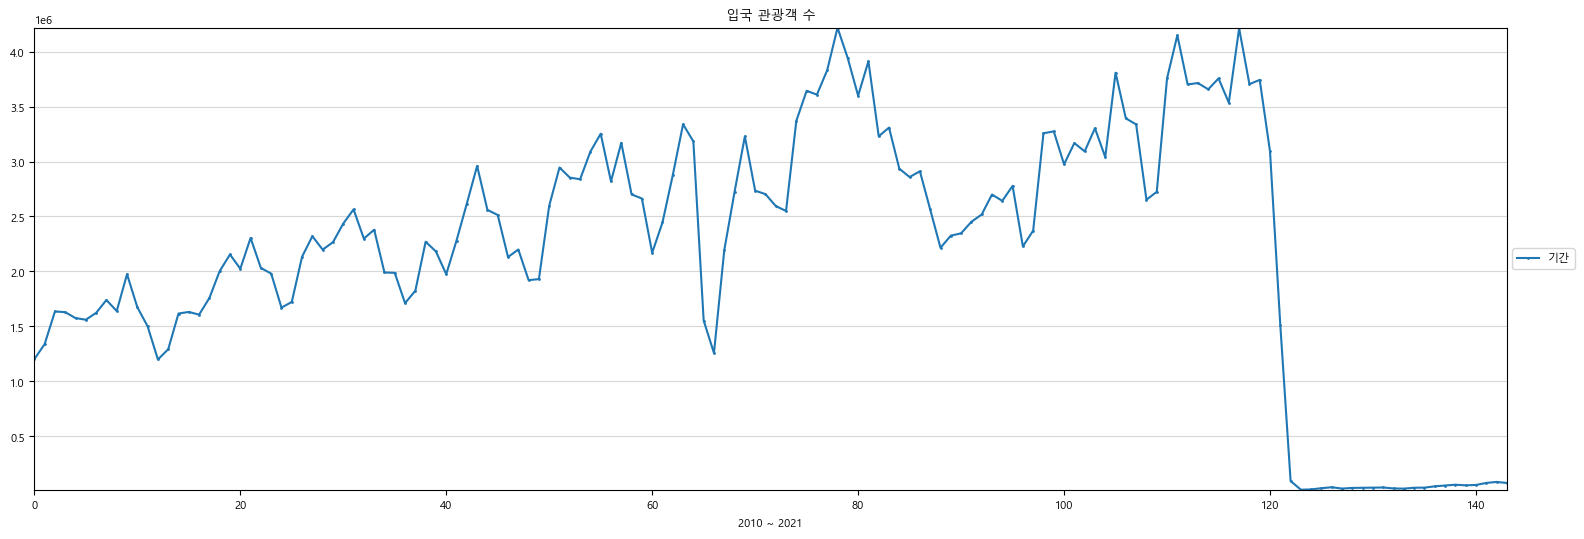

In [65]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df_astype["관광객"], marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df_astype.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('입국 관광객 수')

# x축 레이블 설정
plt.xlabel('2010 ~ 2021')

# y축 레이블 설정
# plt.ylabel('')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()

In [84]:
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus']=False

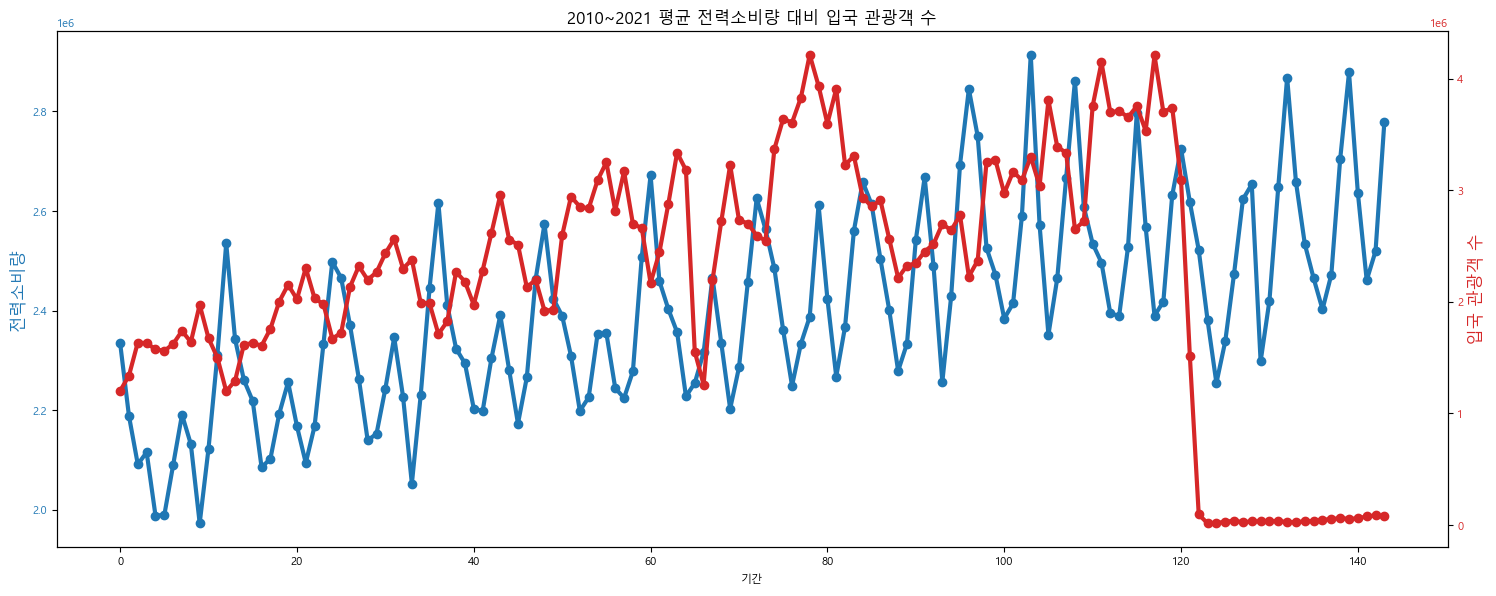

In [66]:
fig, ax1 = plt.subplots(figsize=(15,6),nrows=1,ncols=1)

color_1 = 'tab:blue'
ax1.set_title('2010~2021 평균 전력소비량 대비 입국 관광객 수', fontsize=12)
ax1.set_xlabel('기간')
ax1.set_ylabel('전력소비량', fontsize=12, color=color_1)
ax1.plot(result.index, result.전력소비량 , marker='o', color=color_1,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color_1)


ax2 = ax1.twinx() 
color_2 = 'tab:red'
ax2.set_ylabel('입국 관광객 수', fontsize=12, color=color_2)
ax2.plot(result.index, result.관광객, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()

위 그래프에서 입국 관광객 수가 급격하게 줄어드는 시점 = 코로나19 판데믹이 시작된 시점과 일치
But, 이 그래프만으로는 입국 관광객 수가 국내 전체 전력소비량에 '절대적인' 영향을 미친다고 보기는 어려울 듯 함.